                ## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [95]:
import warnings

# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv(
    "https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv",
    on_bad_lines="skip",
)  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

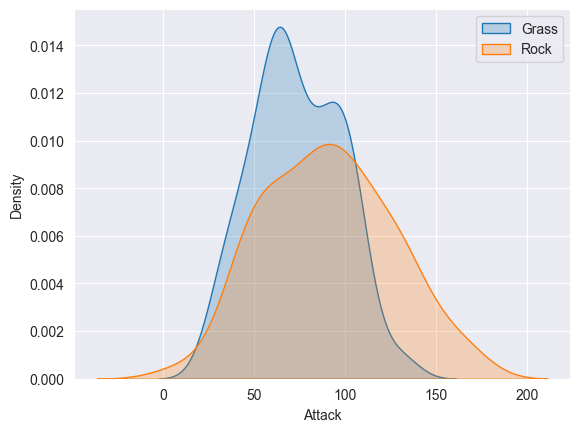

t_stat: -3.316
p_value: 0.999
Не отклоняем нулевую гипотезу: нет достаточной информации, что средняя атака Grass значимо превосходит Rock


In [96]:
pokemon_1 = pokemon[
    (pokemon["Class 1"] != "Rock") & (pokemon["Class 2"] != "Grass")
    | (pokemon["Class 1"] != "Grass") & (pokemon["Class 2"] != "Rock")
]
pok_grass = pokemon_1["Attack"][
    (pokemon_1["Class 1"] == "Grass") | (pokemon_1["Class 2"] == "Grass")
].to_list()
pok_rock = pokemon_1["Attack"][
    (pokemon_1["Class 1"] == "Rock") | (pokemon_1["Class 2"] == "Rock")
].to_list()

plt.figure()
sns.kdeplot(pok_grass, label="Grass", fill=True)
sns.kdeplot(pok_rock, label="Rock", fill=True)
plt.xlabel("Attack")
plt.legend()
plt.show()

t_stat, p_value = ttest_ind(pok_grass, pok_rock, alternative="greater", equal_var=False)

print(f"t_stat: {round(t_stat, 3)}")
print(f"p_value: {round(p_value, 3)}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу: средняя атака Grass значимо превосходит Rock.")
else:
    print(
        "Не отклоняем нулевую гипотезу: нет достаточной информации, что средняя атака Grass значимо превосходит Rock"
    )

Принимая во внимание отрицательную величину t_stat, большую величину p_value и визуальное распределение на KDE очень вероятно, что напротив средняя атака Rock превосходит Grass.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

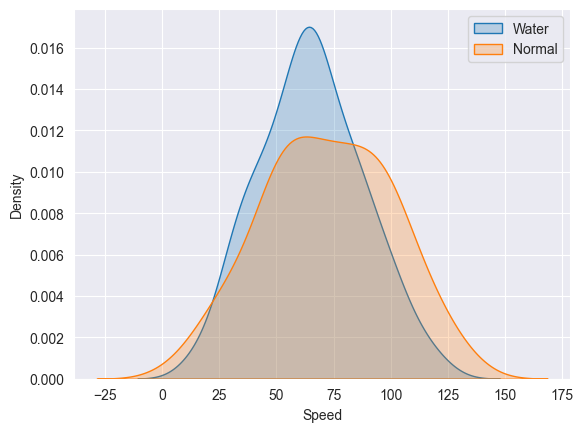

t_stat: -2.103
p_value: 0.982
Не отклоняем нулевую гипотезу: нет достаточной информации, что средняя скорость Water значимо превосходит Normal


In [97]:
pokemon_2 = pokemon[
    (pokemon["Class 1"] != "Normal") & (pokemon["Class 2"] != "Water")
    | (pokemon["Class 1"] != "Water") & (pokemon["Class 2"] != "Normal")
]
pok_water = pokemon_2["Speed"][
    (pokemon_2["Class 1"] == "Water") | (pokemon_2["Class 2"] == "Water")
].to_list()
pok_normal = pokemon_2["Speed"][
    (pokemon_2["Class 1"] == "Normal") | (pokemon_2["Class 2"] == "Normal")
].to_list()

plt.figure()
sns.kdeplot(pok_water, label="Water", fill=True)
sns.kdeplot(pok_normal, label="Normal", fill=True)
plt.xlabel("Speed")
plt.legend()
plt.show()

t_stat, p_value = ttest_ind(
    pok_water, pok_normal, alternative="greater", equal_var=False
)

print(f"t_stat: {round(t_stat, 3)}")
print(f"p_value: {round(p_value, 3)}")

if p_value < 0.05:
    print(
        "Отклоняем нулевую гипотезу: средняя скорость Water значимо превосходит Normal."
    )
else:
    print(
        "Не отклоняем нулевую гипотезу: нет достаточной информации, что средняя скорость Water значимо превосходит Normal"
    )

Принимая во внимание отрицательную величину t_stat, большую величину p_value и визуальное распределение на KDE очень вероятно, что напротив средняя скорость Normal превосходит Water.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [98]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = [
    "Mega Beedrill",
    "Mega Alakazam",
    "Deoxys Normal Forme",
    "Mega Lopunny",
]

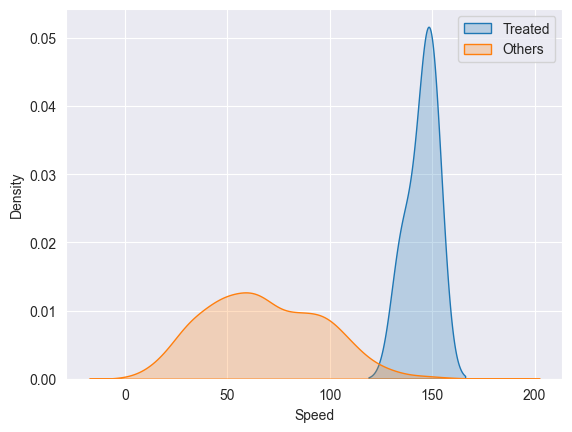

t_stat: 20.964
p_value: 0.0
Отклоняем нулевую гипотезу: средняя скорость покемонов с сывороткой значительно превосходит ср. скорость покемонов без нее


In [99]:
pok_treated = pokemon[pokemon["Name"].isin(treathed_pokemon)]["Speed"].to_list()
pok_others = pokemon[~pokemon["Name"].isin(treathed_pokemon)]["Speed"].to_list()

plt.figure()
sns.kdeplot(pok_treated, label="Treated", fill=True)
sns.kdeplot(pok_others, label="Others", fill=True)
plt.xlabel("Speed")
plt.legend()
plt.show()

t_stat, p_value = ttest_ind(
    pok_treated, pok_others, alternative="greater", equal_var=False
)

print(f"t_stat: {round(t_stat, 3)}")
print(f"p_value: {round(p_value, 3)}")

if p_value < 0.05:
    print(
        "Отклоняем нулевую гипотезу: средняя скорость покемонов с сывороткой значительно превосходит ср. скорость покемонов без нее"
    )
else:
    print(
        "Не отклоняем нулевую гипотезу: нет достаточной информации, что средняя скорость покемонов с сывороткой значимо превосходит ср. скорость покемонов без нее"
    )

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

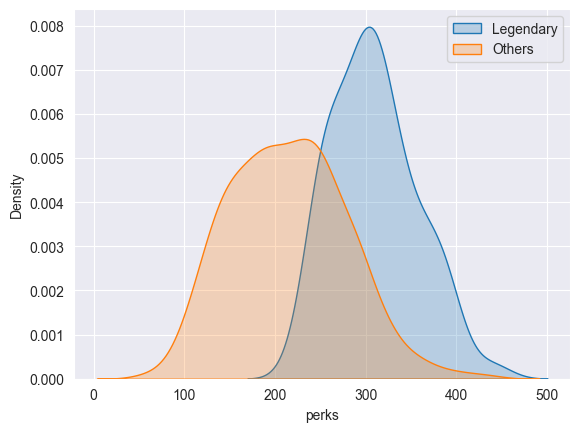

t_stat: 15.198
p_value: 0.0
Отклоняем нулевую гипотезу perks_sum: средний набор характеристик легендарных покемонов значительно превосходит ср. набор характеристик покемонов без них


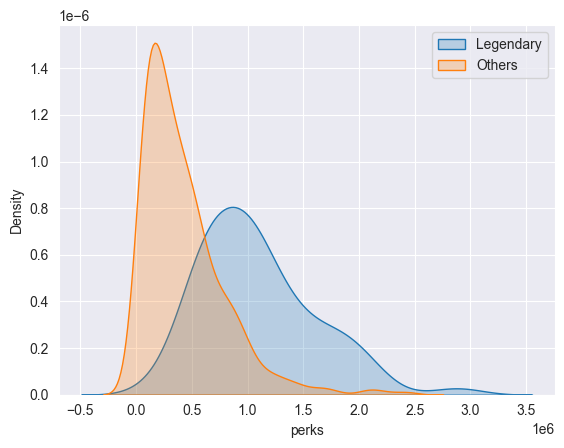

t_stat: 10.079
p_value: 0.0
Отклоняем нулевую гипотезу perks_mult: средний набор характеристик легендарных покемонов значительно превосходит ср. набор характеристик покемонов без них


In [100]:
pokemon_4 = pokemon.copy()
pokemon_4["perks_sum"] = pokemon_4["HP"] + pokemon_4["Attack"] + pokemon_4["Defense"]
pokemon_4["perks_mult"] = pokemon_4["HP"] * pokemon_4["Attack"] * pokemon_4["Defense"]

for perk in ["perks_sum", "perks_mult"]:
    pok_leg = pokemon_4[pokemon_4["Legendary"] == True][perk].to_list()
    pok_rest = pokemon_4[pokemon_4["Legendary"] == False][perk].to_list()

    plt.figure()
    sns.kdeplot(pok_leg, label="Legendary", fill=True)
    sns.kdeplot(pok_rest, label="Others", fill=True)
    plt.xlabel("perks")
    plt.legend()
    plt.show()

    t_stat, p_value = ttest_ind(
        pok_leg, pok_rest, alternative="greater", equal_var=False
    )

    print(f"t_stat: {round(t_stat, 3)}")
    print(f"p_value: {round(p_value, 3)}")

    if p_value < 0.05:
        print(
            f"Отклоняем нулевую гипотезу {perk}: средний набор характеристик легендарных покемонов значительно превосходит ср. набор характеристик покемонов без них"
        )
    else:
        print(
            f"Не отклоняем нулевую гипотезу {perk}: нет достаточной информации, что средний набор характеристик легендарных покемонов значительно превосходит ср. набор характеристик покемонов без них"
        )

Средние характеристики легендарных покемонов действительно превосходят средние характеристики обычных.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [101]:
best_defence_class = ["Rock", "Ground", "Steel", "Ice"]

Levene: p_value = 0.693
ANOVA: p_value = 0.0
Отклоняем нулевую гипотезу: существуют статистически значимые различия между классами.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -11.0436 0.4746 -30.8773  8.7901  False
Ground   Rock  19.3847 0.0235   1.8684  36.901   True
Ground  Steel  28.9108 0.0004  10.5525  47.269   True
   Ice   Rock  30.4283 0.0008  10.0453 50.8113   True
   Ice  Steel  39.9544    0.0  18.8434 61.0653   True
  Rock  Steel    9.526 0.5627  -9.4244 28.4764  False
-----------------------------------------------------


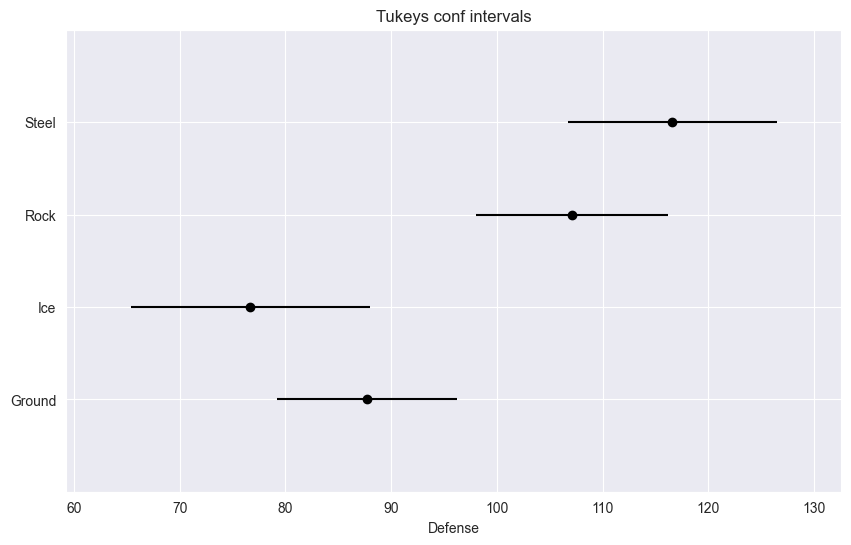

In [102]:
def_classes = {}
for def_class in best_defence_class:
    def_classes[def_class] = pokemon[
        (pokemon["Class 1"] == def_class) | (pokemon["Class 2"] == def_class)
    ]["Defense"].to_list()

# смотрим равенство дисперсий классов
levene_stat, levene_p = levene(*def_classes.values())
print(f"Levene: p_value = {round(levene_p, 3)}")

if levene_p > 0.05:
    anova_stat, anova_p = f_oneway(*def_classes.values())
    print(f"ANOVA: p_value = {round(anova_p, 3)}")

    if anova_p < 0.05:
        print(
            "Отклоняем нулевую гипотезу: существуют статистически значимые различия между классами."
        )
    else:
        print(
            "Не отклоняем нулевую гипотезу: не существует статистически значимых различий между классами."
        )

# посмотрим на разницу
df_class = pd.DataFrame(
    {
        "Defense": [x for lst in def_classes.values() for x in lst],
        "Class": [k for k, lst in def_classes.items() for x in lst],
    }
)

tukey = pairwise_tukeyhsd(
    endog=df_class["Defense"], groups=df_class["Class"], alpha=0.05
)
print(tukey.summary())

tukey.plot_simultaneous()
plt.title("Tukeys conf intervals")
plt.xlabel("Defense")
plt.show()

Значительная разница в средней защите существует у групп (Ice, Ground) и (Rock, Steel). У второй подгруппы средние показатели защиты лучше, чем у первой.

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.